In [1]:
# author: Kowsar Mojtabaee

In [2]:
# Q2 - CNN

In [21]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import f1_score, precision_score, accuracy_score

In [4]:
# Loading the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
print("Fashion Mnist dataset loaded")
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
Fashion Mnist dataset loaded
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [5]:
# some preprations

num_classes = len(np.unique(y_train))

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [41]:
# bulding the 2nd architecture of the paper:

model2 = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        keras.layers.Conv2D(64, kernel_size=(2, 2), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(0.25),
        keras.layers.Conv2D(64, kernel_size=(2, 2), activation="relu"),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model2.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 27, 27, 64)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 64)        16448     
                                                                 
 dropout_12 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 dense_6 (Dense)             (None, 12, 12, 64)        4160      
                                                      

In [42]:
batch_size = 128
epochs = 50

model2.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

history2 = model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/50
469/469 [==============================] - 5s 9ms/step - loss: 1.1836 - accuracy: 0.5878
Epoch 2/50
469/469 [==============================] - 5s 10ms/step - loss: 0.7354 - accuracy: 0.7318
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 0.6770 - accuracy: 0.7550
Epoch 4/50
469/469 [==============================] - 4s 8ms/step - loss: 0.6278 - accuracy: 0.7721
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.5931 - accuracy: 0.7850
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.5693 - accuracy: 0.7928
Epoch 7/50
469/469 [==============================] - 4s 8ms/step - loss: 0.5506 - accuracy: 0.8001
Epoch 8/50
469/469 [==============================] - 4s 8ms/step - loss: 0.5314 - accuracy: 0.8087
Epoch 9/50
469/469 [==============================] - 4s 8ms/step - loss: 0.5143 - accuracy: 0.8142
Epoch 10/50
469/469 [==============================] - 4s 8ms/step - loss: 0.4981 - accuracy: 0.820

In [43]:
model2.evaluate(x_train, y_train)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.2980 - accuracy: 0.8938


[0.2979930341243744, 0.8938000202178955]

Text(0, 0.5, 'acc')

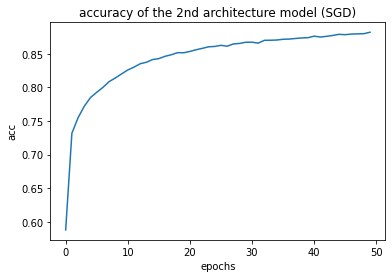

In [51]:
plt.plot(history2.history['accuracy'])
plt.title("accuracy of the 2nd architecture model (SGD)")
plt.xlabel('epochs')
plt.ylabel("acc")

In [45]:
y_pred = model2.predict(x_train)
y_pred1 = np.argmax(y_pred, axis=1)

y_pred = model2.predict(x_test)
y_pred2 = np.argmax(y_pred, axis=1)

# Print f1, precision, and recall scores
print("Results of the 2nd Architecture of the paper:")
print("On train set:")
print("\tprecision (avrage):", precision_score(np.argmax(y_train, axis=1), y_pred1 , average="macro"))
print("\taccuracy:",accuracy_score(np.argmax(y_train, axis=1), y_pred1))
print("\tf1_score (avrage):",f1_score(np.argmax(y_train, axis=1), y_pred1 , average="macro"))
print("On test set:")
print("\tprecision (avrage):", precision_score(np.argmax(y_test, axis=1), y_pred2 , average="macro"))
print("\taccuracy:",accuracy_score(np.argmax(y_test, axis=1), y_pred2 ))
print("\tf1_score (avrage):",f1_score(np.argmax(y_test, axis=1), y_pred2 , average="macro"))

313/313 [==============================] - 1s 3ms/step
Results of the 2nd Architecture of the paper:
On train set:
	precision (avrage): 0.8953757417591218
	accuracy: 0.8938
	f1_score (avrage): 0.8941885310794732
On test set:
	precision (avrage): 0.8866864966009981
	accuracy: 0.885
	f1_score (avrage): 0.8853818749215415


In [46]:
# bulding the 3rd architecture of the paper:

model3 = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        keras.layers.Conv2D(64, kernel_size=(2, 2), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(0.25),
        keras.layers.Conv2D(64, kernel_size=(2, 2), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(0.25),
        keras.layers.Conv2D(64, kernel_size=(2, 2), activation="relu"),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dropout(0.25),
        keras.layers.Flatten(),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model3.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 27, 27, 64)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_14 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 64)        16448     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_15 (Dropout)        (None, 6, 6, 64)         

In [47]:
batch_size = 128
epochs = 50

model3.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

history3 = model3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/50
469/469 [==============================] - 4s 8ms/step - loss: 1.8850 - accuracy: 0.2897
Epoch 2/50
469/469 [==============================] - 4s 7ms/step - loss: 1.0565 - accuracy: 0.5974
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 0.9250 - accuracy: 0.6530
Epoch 4/50
469/469 [==============================] - 4s 7ms/step - loss: 0.8590 - accuracy: 0.6798
Epoch 5/50
469/469 [==============================] - 3s 7ms/step - loss: 0.8088 - accuracy: 0.6998
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.7608 - accuracy: 0.7171
Epoch 7/50
469/469 [==============================] - 4s 8ms/step - loss: 0.7179 - accuracy: 0.7329
Epoch 8/50
469/469 [==============================] - 4s 8ms/step - loss: 0.6805 - accuracy: 0.7455
Epoch 9/50
469/469 [==============================] - 4s 8ms/step - loss: 0.6532 - accuracy: 0.7554
Epoch 10/50
469/469 [==============================] - 4s 7ms/step - loss: 0.6300 - accuracy: 0.7642

In [48]:
model3.evaluate(x_train, y_train)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.3566 - accuracy: 0.8735


[0.3566168546676636, 0.8735166788101196]

Text(0, 0.5, 'acc')

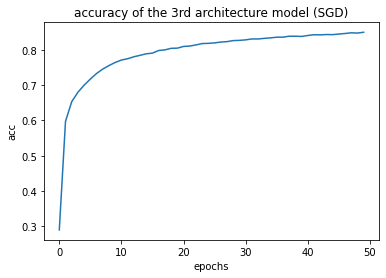

In [52]:
plt.plot(history3.history['accuracy'])
plt.title("accuracy of the 3rd architecture model (SGD)")
plt.xlabel('epochs')
plt.ylabel("acc")

In [53]:
y_pred = model3.predict(x_train)
y_pred1 = np.argmax(y_pred, axis=1)

y_pred = model3.predict(x_test)
y_pred2 = np.argmax(y_pred, axis=1)

# Print f1, precision, and recall scores
print("Results of the 3rd Architecture of the paper:")
print("On train set:")
print("\tprecision (avrage):", precision_score(np.argmax(y_train, axis=1), y_pred1 , average="macro"))
print("\taccuracy:",accuracy_score(np.argmax(y_train, axis=1), y_pred1))
print("\tf1_score (avrage):",f1_score(np.argmax(y_train, axis=1), y_pred1 , average="macro"))
print("On test set:")
print("\tprecision (avrage):", precision_score(np.argmax(y_test, axis=1), y_pred2 , average="macro"))
print("\taccuracy:",accuracy_score(np.argmax(y_test, axis=1), y_pred2 ))
print("\tf1_score (avrage):",f1_score(np.argmax(y_test, axis=1), y_pred2 , average="macro"))

313/313 [==============================] - 1s 3ms/step
Results of the 3rd Architecture of the paper:
On train set:
	precision (avrage): 0.8732262777806146
	accuracy: 0.8735166666666667
	f1_score (avrage): 0.8731160506313176
On test set:
	precision (avrage): 0.8660608914314404
	accuracy: 0.8662
	f1_score (avrage): 0.8657672318812517
